# EDA Dataset Análisis de las Sociedades Argentinas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
from dotenv import load_dotenv

Creamos la conexión a la BD.

In [2]:
load_dotenv()

DB_USER = os.getenv("MYSQL_USER")
DB_PASSWORD = os.getenv("MYSQL_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_NAME = os.getenv("MYSQL_DATABASE")

DATABASE_URL = f"mysql+mysqlconnector://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}"

engine = create_engine(DATABASE_URL)
connection = engine.connect()

Leemos todos los avisos disponibles.

In [3]:
query = "SELECT * from avisos;"
df = pd.read_sql(query, connection)
df.head()

,id,aviso_id,seccion,sociedad,rubro,id_rubro,fecha_publicacion,detalle_aviso,crawled_at,procesado
0,1,A1,Segunda sección,JUZGADOS NACIONALES \n EN LO CIVIL\n N° 42,CITACIONES Y NOTIFICACIONES. CONCURSOS Y QUIEB...,3100,2011-01-03,El Juzgado Nacional de Primera Instancia N° 42...,2025-09-20 02:31:54,0
1,2,A2,Segunda sección,JUZGADO NACIONAL EN LO \n CIVIL NRO. 3 \n SECR...,CITACIONES Y NOTIFICACIONES. CONCURSOS Y QUIEB...,3100,2011-01-06,El Juzgado Nacional de Primera Instancia en lo...,2025-09-20 02:31:56,0
2,3,A3,Segunda sección,JUZGADOS NACIONALES \n EN LO CIVIL\n N° 19,CITACIONES Y NOTIFICACIONES. CONCURSOS Y QUIEB...,3100,2011-01-14,Juzgado Nacional de Primera Instancia en lo Ci...,2025-09-20 02:31:57,0
3,4,A4,Segunda sección,N° 82,CITACIONES Y NOTIFICACIONES. CONCURSOS Y QUIEB...,3100,2011-01-03,La Señora Juez Subrogante a cargo del Juzgado ...,2025-09-20 02:31:58,0
4,5,A5,Segunda sección,Nº 19,CITACIONES Y NOTIFICACIONES. CONCURSOS Y QUIEB...,3100,2010-12-03,El Juzgado Nacional de Primera Instancia en lo...,2025-09-20 02:31:59,0


In [4]:
print("Columnas: ", df.columns.to_list())
print("# de avisos:", len(df))
print("Tipos de Datos::\n", df.dtypes)
print("\n# de Valores únicos:\n", df.nunique())

Columnas:  ['id', 'aviso_id', 'seccion', 'sociedad', 'rubro', 'id_rubro', 'fecha_publicacion', 'detalle_aviso', 'crawled_at', 'procesado']
# de avisos: 1342069
Tipos de Datos::
 id                            int64
aviso_id                     object
seccion                      object
sociedad                     object
rubro                        object
id_rubro                     object
fecha_publicacion            object
detalle_aviso                object
crawled_at           datetime64[ns]
procesado                     int64
dtype: object

# de Valores únicos:
 id                   1342069
aviso_id             1342069
seccion                    1
sociedad              308939
rubro                     19
id_rubro                  19
fecha_publicacion       3544
detalle_aviso         940086
crawled_at             72586
procesado                  2
dtype: int64


Convertimos la columna `id_rubro` a integer.

In [ ]:
print((df['id_rubro'] + ' - ' + df['rubro']).value_counts())
df['id_rubro'] = df['id_rubro'].astype(int)

2300 - AVISOS COMERCIALES                                          352521
3300 - SUCESIONES                                                  330253
2100 - CONVOCATORIAS                                               167840
3100 - CITACIONES Y NOTIFICACIONES. CONCURSOS Y QUIEBRAS. OTROS    157610
1210 - CONTRATO SRL                                                 93952
1110 - CONSTITUCION SA                                              60512
1120 - REFORMA SA                                                   60434
1220 - MODIFICACIONES SRL                                           43105
3400 - REMATES JUDICIALES                                           26228
4000 - PARTIDOS POLITICOS                                           14987
1130 - CONSTITUCION SAS                                             14620
2200 - TRANSF. FONDO DE COMERCIO                                    12657
2400 - REMATES COMERCIALES                                           3056
1420 - REFORMA OTRAS SOCIEDADES       

Los **rubros clave** para la constitución de las Sociedades son: 
- 1110 - CONSTITUCION SA (Sociedad Anónima)
- 1130 - CONSTITUCION SAS (Sociedad Anónima Simplificada)

La S.A. es una estructura tradicional, más rígida, costosa y compleja de constituir y administrar (requiere escritura pública, un mínimo de dos socios y órganos de gestión y fiscalización formales), la S.A.S. es un vehículo moderno diseñado para emprendedores que permite una creación rápida, económica y digital, puede ser constituida por un único socio y ofrece una enorme libertad para organizar su administración y funcionamiento de manera más ágil y con menos formalidades.

Definimos el método `plot_fecha_publicacion` para graficar las publicaciones por año.

In [14]:
def plot_fecha_publicacion(df):
    yearly_counts = df['year'].value_counts().sort_index()
    plt.figure(figsize=(10,6))
    plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.title('Count of Publications by Year')
    plt.xticks(yearly_counts.index.astype(int)) # Ensure x-axis ticks are integers
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

Convertimos la columna `fecha_publicacion` a tipo datetime.

Al graficar las publicaciones por año, se detectaron 3011 registros con fecha incorrecta.

Cantidad de entradas erróneas:  3011
fecha_publicacion
1800-06-24    872
1800-10-24    466
1817-03-22    397
1800-01-01    389
1800-12-14    339
1918-06-12    338
1800-01-16    210
Name: count, dtype: int64


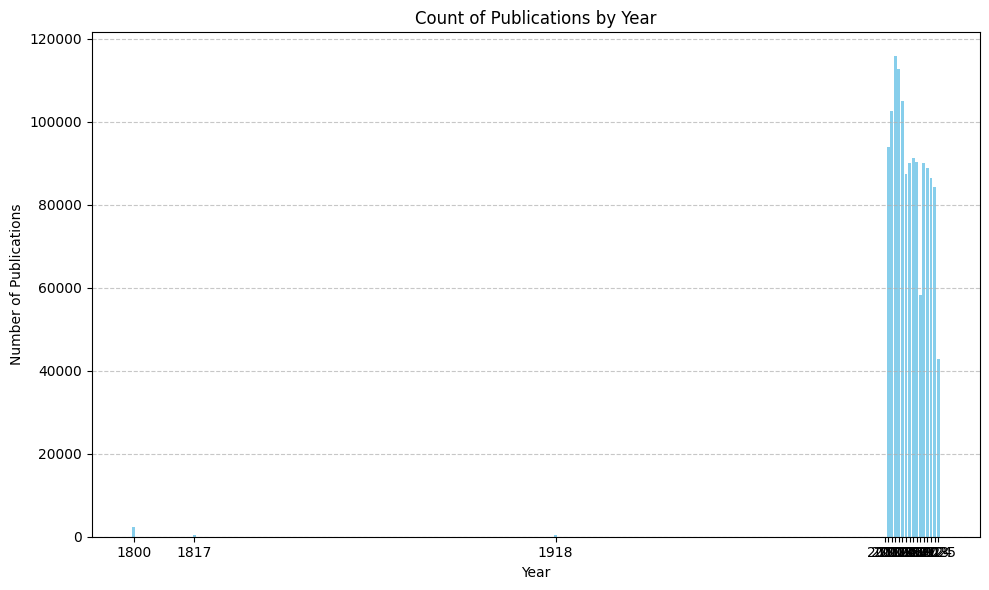

In [15]:
df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'], errors='coerce')
df.dropna(subset=['fecha_publicacion'], inplace=True)

df['year'] = df['fecha_publicacion'].dt.year

plot_fecha_publicacion(df)
print("Cantidad de entradas erróneas: ", len(df[df['year'] < 2000]['fecha_publicacion']))
print(df[df['year'] < 2000]['fecha_publicacion'].value_counts())

Eliminamos las entradas con año anterior al 2000.

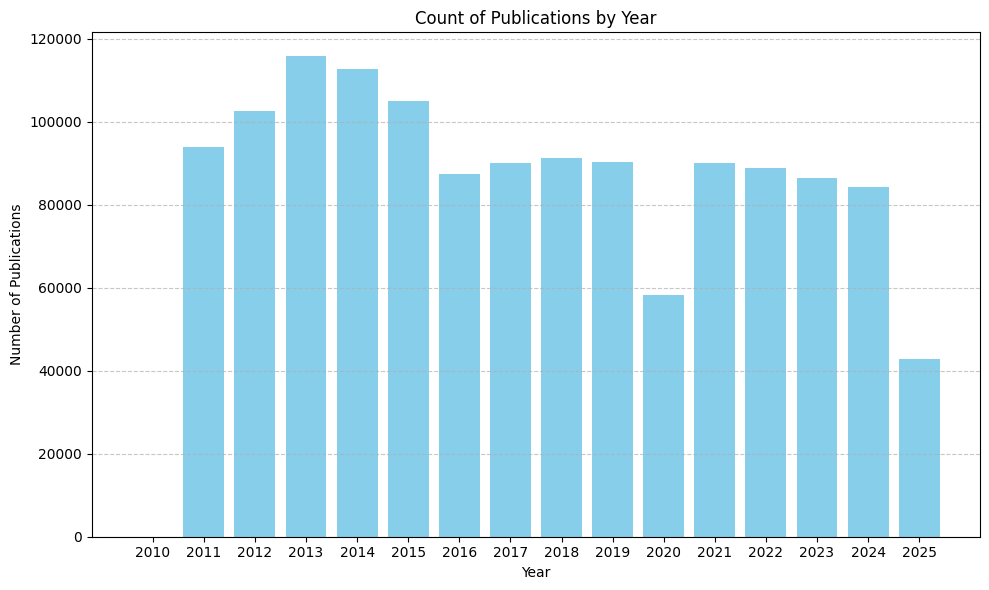

In [16]:
df = df[df['year'] > 2000]
plot_fecha_publicacion(df)

Definimos un nuevo DataFrame `df_constituciones` solo con las constituciones de Sociedades.

In [17]:
df_constituciones = df[df['id_rubro'].isin([1110, 1130])]
print("# de Sociedades Constituidas: ", len(df_constituciones))

# de Sociedades Constituidas:  74930


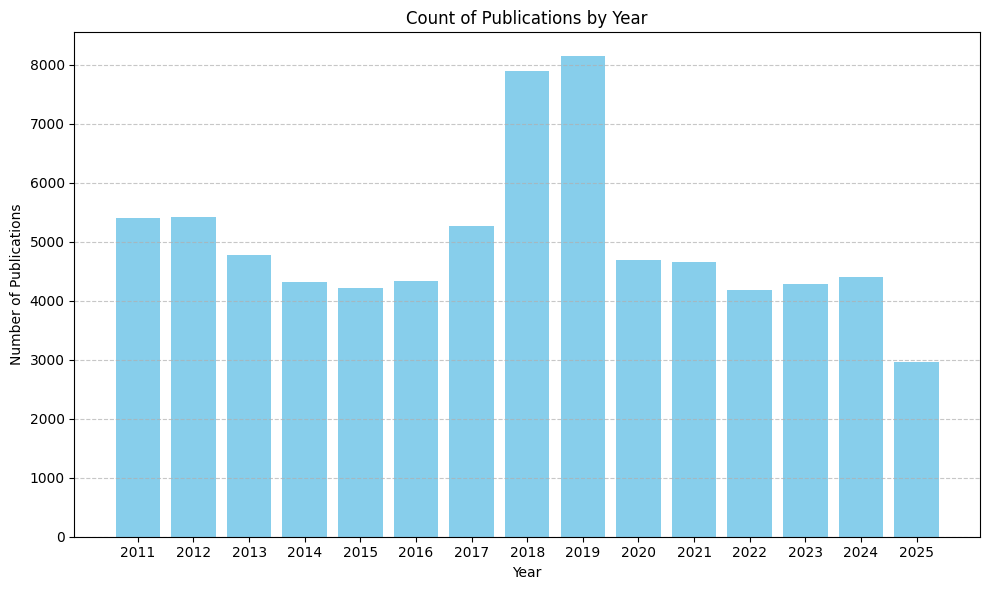

In [18]:
plot_fecha_publicacion(df_constituciones)

In [19]:
df_constituciones.head()

,id,aviso_id,seccion,sociedad,rubro,id_rubro,fecha_publicacion,detalle_aviso,crawled_at,year
320,321,A322,Segunda sección,TECNOLOGIA Y CABLEADOS,CONSTITUCION SA,1110,2011-01-03,"Por Esc. 255 del 21/12.10, Carlos Alberto Koga...",2025-09-20 02:36:44,2011
322,323,A324,Segunda sección,BOMBAS DE HORMIGON,CONSTITUCION SA,1110,2011-01-03,"Por Esc. 247 del 16/12/10, Rodolfo Gontek, 27/...",2025-09-20 02:36:45,2011
324,325,A326,Segunda sección,BHRISA,CONSTITUCION SA,1110,2011-01-03,"Agustín Rodolfo Spotorno, con DNI 22.501.187, ...",2025-09-20 02:36:45,2011
343,344,A345,Segunda sección,BELFIL,CONSTITUCION SA,1110,2011-01-03,"Carlos Enrique Bilevich, dni: 17029874 y Gabri...",2025-09-20 02:36:49,2011
366,367,A368,Segunda sección,GRUPO SAMIRA,CONSTITUCION SA,1110,2011-01-03,"1) Rosela Beatriz Diaz, 18-7-79, DNI 27368918,...",2025-09-20 02:36:54,2011


La columna `detalle_aviso` contiene la información más relevante para el análisis. Para poder encontrar sus características, es necesario procesar la columna para convertirla a un formato estructurado.

Todas las sociedades deben cumplir con el Artículo 11 de la Ley 19.550. 

Este es un ejemplo de una constitución, pero pueden escribirse de manera no estructurada:

In [20]:
print(df_constituciones.sample(1)['detalle_aviso'].iloc[0])

Por escritura del 02/11/2018 se constituyo la sociedad. Socios: Fabian Enrique ARES, 19/6/67, DNI 18.414.218, Ruta 58, Km 10, Lote 6, Fracción 16, Club de Campo el Lauquen San Vicente Provincia de Buenos Aires; y Claudio Adrian ATANCE, 5/9/68, DNI 20.507.025, Darwin 327 Piso 14 Departamento A, CABA, ambos argentinos, casados, empresarios, Plazo: 99 años; Objeto: a) Toda actividad destinada al diseño de servicios, diseño de software, diseño de imagen, transformación digital, y experiencia de usuario asi como el diseño, producción, creación, explotación y mantenimiento de páginas web, y de bases de datos orientadas al marketing y la publicidad ya sea tradicional o mediante internet y de toda otra forma electrónica. b) Creación, diseño y desarrollo de sistemas operativos destinados al desarrollo del diseño gráfico, artes gráficas y a la imprenta en general; Capital: $ 100.000; Cierre de ejercicio: 31/12; Presidente: Fabian Enrique Ares, y Director Suplente: Claudio Adrian Atance, ambos co

En base al **Artículo 11 de la Ley 19.550**, todas las constituciones deben contener la siguiente información:
1) El nombre, edad, estado civil, nacionalidad, profesión, domicilio y número de documento de identidad de los socios;
2) La razón social o la denominación, y el domicilio de la sociedad. Si en el contrato constare solamente el domicilio, la dirección de su sede deberá inscribirse mediante petición por separado suscripta por el órgano de administración. Se tendrán por válidas y vinculantes para la sociedad todas las notificaciones efectuadas en la sede inscripta;
3) La designación de su objeto, que debe ser preciso y determinado;
4) El capital social, que deberá ser expresado en moneda argentina, y la mención del aporte de cada socio. En el caso de las sociedades unipersonales, el capital deberá ser integrado totalmente en el acto constitutivo;
5) El plazo de duración, que debe ser determinado;
6) La organización de la administración, de su fiscalización y de las reuniones de socios;
7) Las reglas para distribuir las utilidades y soportar las pérdidas. En caso de silencio, será en proporción de los aportes. Si se prevé sólo la forma de distribución de utilidades, se aplicará para soportar las pérdidas y viceversa;
8) Las cláusulas necesarias para que puedan establecerse con precisión los derechos y obligaciones de los socios entre sí y respecto de terceros;
9) Las cláusulas atinentes al funcionamiento, disolución y liquidación de la sociedad.

A partir de este punto, el objetivo es obtener la mejor muestra para construir un dataset diverso, que permita hacer un finetuning de Gemma 3 4B.

Este LM va a recibir de input una constitución, y su output será un JSON estructurado con la metadata de la sociedad, capital social, plazos y socios.

En el conjunto tenemos ~22 millones de palabras.

In [21]:
total_tokens = df_constituciones['detalle_aviso'].str.split().str.len().sum()
print(f'Cantidad de palabras: {total_tokens:,}')


Cantidad de palabras: 22,512,430


Para intentar clasificar los detalles, filtramos con una regular expression, los textos que contengan del 1 al 9, en alguno de los formatos: 1., (1), [1]

In [22]:
regex_pattern = r'(?<!\d)(?:[1-9][\.\-]|\([1-9]\)|\[[1-9]\])'
filtered_df = df_constituciones[df_constituciones['detalle_aviso'].str.contains(regex_pattern, na=False)]

print("# de Sociedades Constituidas: ", len(df_constituciones))
print("# de Sociedades Constituidas, con formato ordenado: ", len(filtered_df))

ratio = len(filtered_df) / len(df_constituciones)
print(f"% De Sociedades constituidas con formato ordenado: {ratio:.2%}")

# de Sociedades Constituidas:  74930
# de Sociedades Constituidas, con formato ordenado:  39928
% De Sociedades constituidas con formato ordenado: 53.29%


Alrededor del 53.29% de los avisos de sociedades mantienen numerado cada punto requerido por el Artículo 11. Esto no es un valor exacto, ya que existen documentos que usan los separadores para delimitar la cantidad de acciones, o accionistas.

In [23]:
print(filtered_df.sample(1)['detalle_aviso'].iloc[0])

Constitución: Esc. 688 del 17-10-22 Registro 200 CABA. Socios: Cinthya Elizabeth Olazarri, argentina, nacida el 27-5-92, soltera, DNI 36.749.976, CUIT 27-36749976-7, empresaria, domiciliada en Av.Corrientes 1584 piso 4 CABA, Rocio Buffolo, argentina, nacida el 2-8-97, soltera, DNI 40.614.832, CUIT 27-40614832-2, empresaria, con domicilio en Salguero 1063 piso 3 depto.A, CABA; Darío Antonio Carambula Galeano, paraguayo, nacido el 14-8-73, soltero, DBU 92.329.152, CUIL 20-92329152-1, empresario, con domicilio en Paraná 39 piso 10 depto.A, CABA; y Gabriel Andrés Juricich, argentino, nacido el 21-3-61, divorciado, DNI 14.508.394, CUIT 20-14508394-0, abogado, con domicilio en Catamarca 159 piso 1 depto.B, CABA. Duración: 30 años. Objeto: realizar por cuenta propia, de terceros, o asociada a ellos las siguientes actividades: A) Producción, realización, organización, comercialización, importación, exportación y contratación en cualquiera de sus formas de espectáculos artísticos, obras teatral

Este método no es confiable, ya que los filtrados pueden fallar, por lo que vamos a aplicar otras técnicas para comprender mejor los avisos de constitución disponibles.

A continuación, se van a calcular tres métricas:
- `character_count`: Cantidad total de caracteres.
- `word_count`: Cantidad total de palabras.
- `line_count`: Cantidad total de líneas.

In [74]:
df_constituciones.loc[:, 'character_count'] = df_constituciones['detalle_aviso'].str.len()
df_constituciones.loc[:, 'word_count'] = df_constituciones['detalle_aviso'].str.split().str.len()
df_constituciones.loc[:, 'line_count'] = df_constituciones['detalle_aviso'].str.split('\n').str.len()

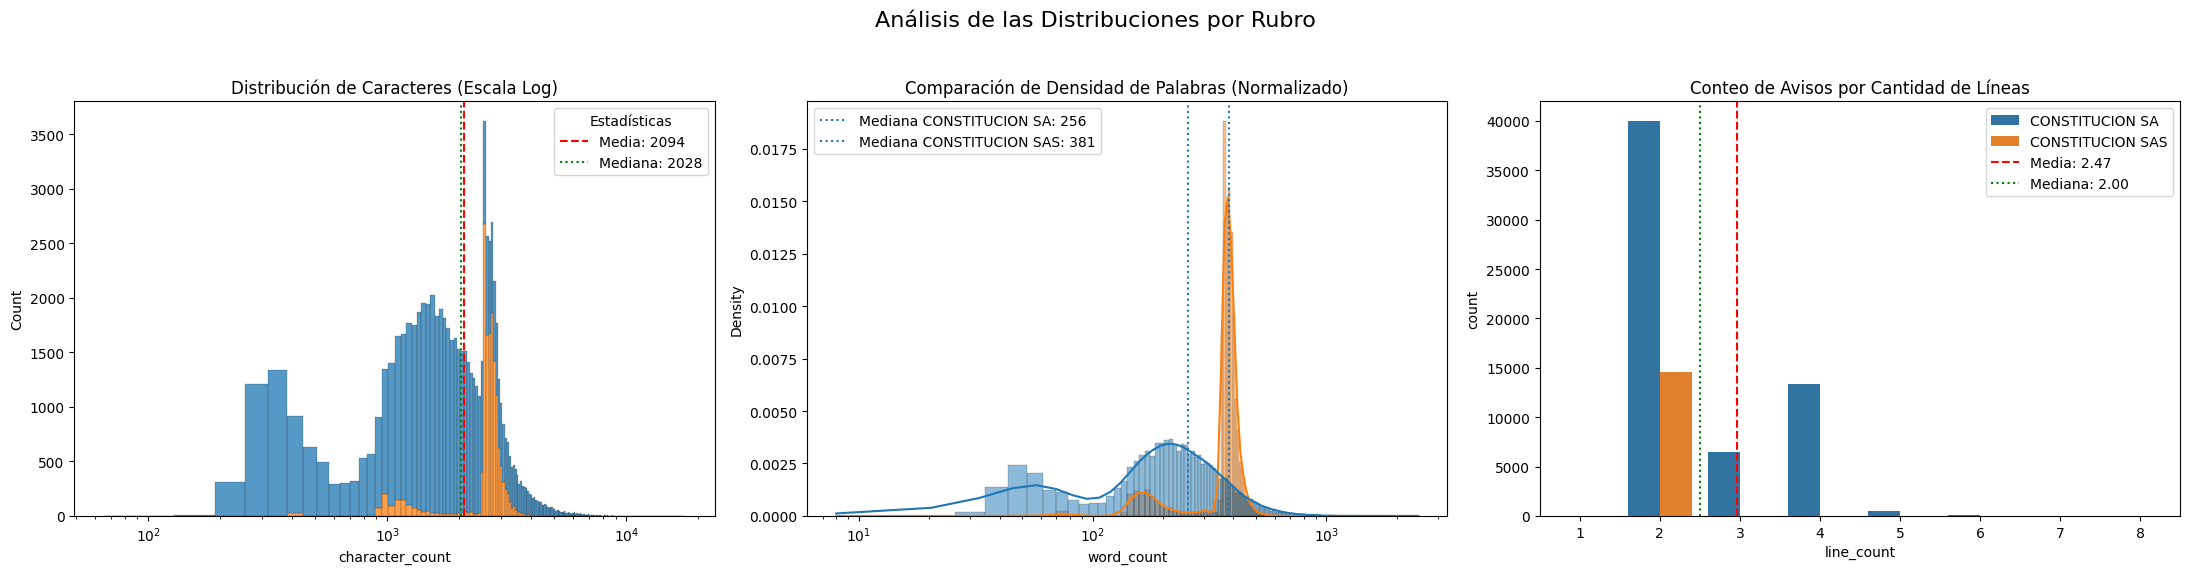

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('Análisis de las Distribuciones por Rubro', fontsize=16)

# --- 1. Caracteres (Escala Logarítmica y Mediana) ---
sns.histplot(data=df_constituciones, x='character_count', hue='rubro', multiple='stack', ax=axes[0])
axes[0].set_title('Distribución de Caracteres (Escala Log)')
axes[0].set_xscale('log') # Aplicar escala logarítmica

# Añadir líneas de media y mediana
mean_char = df_constituciones['character_count'].mean()
median_char = df_constituciones['character_count'].median()
axes[0].axvline(mean_char, color='r', linestyle='--', label=f'Media: {mean_char:.0f}')
axes[0].axvline(median_char, color='g', linestyle=':', label=f'Mediana: {median_char:.0f}')
axes[0].legend(title='Estadísticas')

# --- 2. Palabras (Comparación de Densidad Normalizada) ---
sns.histplot(
    data=df_constituciones, 
    x='word_count', 
    hue='rubro',
    multiple='layer', 
    stat='density', 
    common_norm=False,
    kde=True,
    ax=axes[1]
)
axes[1].set_title('Comparación de Densidad de Palabras (Normalizado)')
axes[1].set_xscale('log')

# Calcular y mostrar la mediana para cada rubro
for rubro_name in df_constituciones['rubro'].unique():
    median_val = df_constituciones[df_constituciones['rubro'] == rubro_name]['word_count'].median()
    axes[1].axvline(median_val, linestyle=':', label=f'Mediana {rubro_name}: {median_val:.0f}')
axes[1].legend()


# --- 3. Líneas (Usando un Bar Plot para datos discretos) ---
# Para datos con pocos valores únicos como 'line_count', un bar plot es a menudo más claro.
sns.countplot(data=df_constituciones, x='line_count', hue='rubro', ax=axes[2])
axes[2].set_title('Conteo de Avisos por Cantidad de Líneas')
mean_line = df_constituciones['line_count'].mean()
median_line = df_constituciones['line_count'].median()
axes[2].axvline(mean_line - 0.5, color='r', linestyle='--', label=f'Media: {mean_line:.2f}') # El -0.5 es para centrar la línea entre las barras
axes[2].axvline(median_line - 0.5, color='g', linestyle=':', label=f'Mediana: {median_line:.2f}')
axes[2].legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Utilizando estos gráficos, se pueden notar algunas conclusiones:
- Los avisos de CONSTITUCION SAS (naranja) son muy homogéneos. El gráfico de densidad muestra que tienen una longitud muy predecible y consistente, con una mediana de 381 palabras.
- Por el contrario, los avisos de CONSTITUCION SA (azul) son mucho más variables. Su distribución de palabras es más ancha y plana, indicando una gran diversidad en la longitud de los avisos, a pesar de que su mediana es menor (256 palabras).
- El primer gráfico (distribución de caracteres) muestra dos "grupos" o modelos de longitud. Las SAS se concentran casi exclusivamente en el modelo de avisos más cortos (alrededor de 2000 caracteres), mientras que las SA están presentes en ambos, dominando el grupo de avisos más largos. Esto refuerza la idea de mayor variabilidad en las SA.

En resumen, los avisos de constitución de SAS siguen un formato muy estandarizado y predecible en longitud y estructura, mientras que los de SA presentan una diversidad mucho mayor.

A continuación, vamos a utilizar BERT para vectorizar los anuncios, y luego poder utilizar K-Means para hacer un clustering automático de los anuncios en base a su estructura y contenido.

In [26]:
import torch
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

Primero, definimos el device a utilizar para ejecutar el modelo. En esta caso vamos a trabajar en GPU con CUDA.

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


Cargamos un modelo de SentenceTransformer, en este caso paraphrase-multilingual-MiniLM-L12-v2, un modelo de 384 dimensiones, que mapea oraciones y párrafos a un espacio vectorial, para poder clusterizarlo.

In [28]:
print("Loading SentenceTransformer model...")
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2', device=device)
print("Model loaded.")

Loading SentenceTransformer model...
Model loaded.


En este paso, vamos a generar los embeddings para cada aviso. Este es el proceso de mayor costo, en CPU puede tardar mucho, por eso es preferible ejecutar en GPU.

In [75]:
print(f"Generating embeddings for {len(df_constituciones)} documents...")
df_constituciones.loc[:, 'detalle_aviso'] = df_constituciones['detalle_aviso'].astype(str)
embeddings = model.encode(df_constituciones['detalle_aviso'].tolist(), show_progress_bar=True)
print("Embeddings generated with shape:", embeddings.shape)

Generating embeddings for 74930 documents...


Batches:   0%|          | 0/2342 [00:00<?, ?it/s]

Embeddings generated with shape: (74930, 384)


Luego, vamos a agrupar los embeddings calculados en ocho clusters, utilizando KMeans.

In [76]:
num_clusters = 8
print(f"Running K-Means clustering with k={num_clusters}...")
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(embeddings)

# Assign the cluster label to each document in the DataFrame
df_constituciones.loc[:, 'cluster'] = kmeans.labels_
print("Clustering complete.")

Running K-Means clustering with k=8...
Clustering complete.


Los embeddings, al tener 384 dimensiones, necesitamos reducirlos a un formato bi-dimensional para poder graficarlo. Por esto utilizamos t-SNE, que asigna a cada data point, una posición en un espacio bi-dimensional.

Reducing dimensions with t-SNE for visualization...
t-SNE complete.


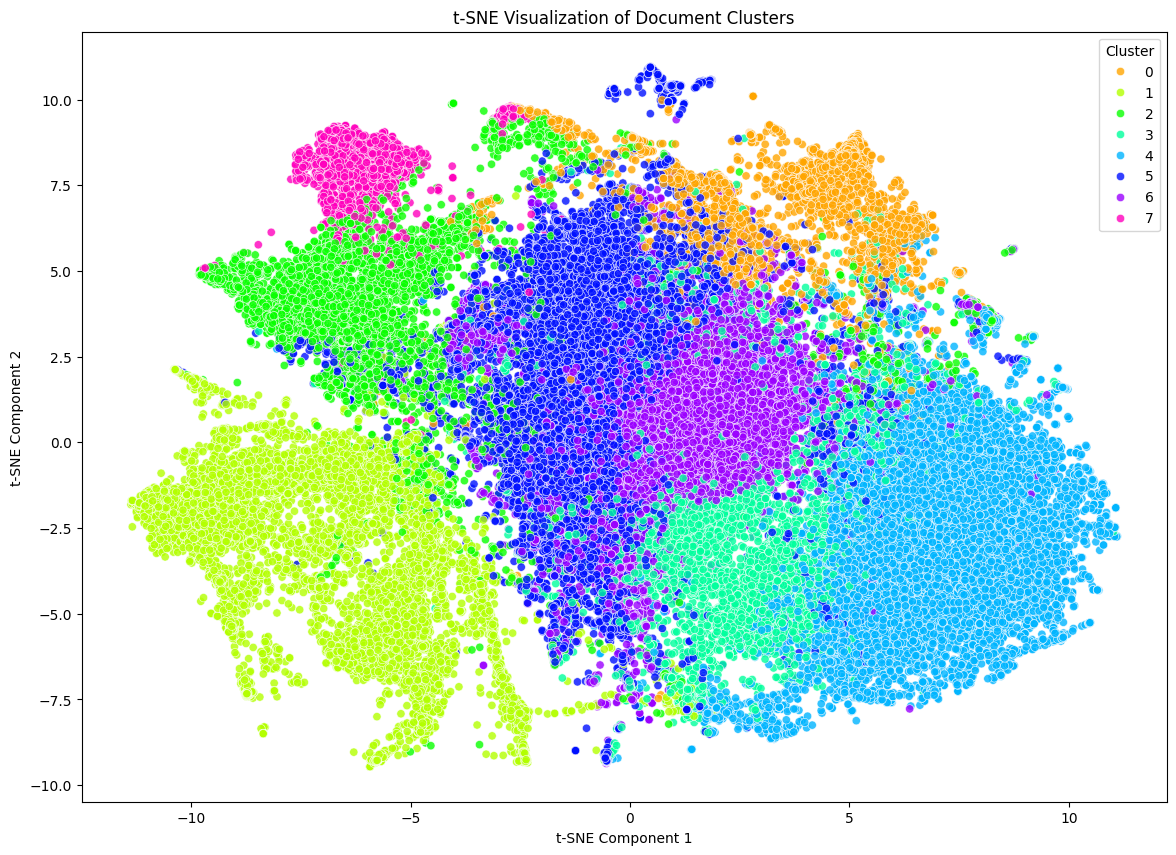


Distribution of documents per cluster:
cluster
0     5036
1    14451
2     6901
3     6736
4    14767
5    14804
6     9863
7     2372
Name: count, dtype: int64


In [77]:
print("Reducing dimensions with t-SNE for visualization...")

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=300)
embeddings_2d = tsne.fit_transform(embeddings)
df_constituciones.loc[:, 'tsne_x'] = embeddings_2d[:, 0]
df_constituciones.loc[:, 'tsne_y'] = embeddings_2d[:, 1]
print("t-SNE complete.")

# Create the scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='cluster',
    palette=sns.color_palette("hsv", n_colors=num_clusters),
    data=df_constituciones,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE Visualization of Document Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the size of each cluster
print("\nDistribution of documents per cluster:")
print(df_constituciones['cluster'].value_counts().sort_index())

Cada número de cluster representa un formato o plantilla particular de constitución. Algunas conclusiones del análisis son las siguientes:
- Los clusters más grandes (como el 1, 4, 5 y 6) son, muy probablemente, los formatos más comunes y estandarizados en el conjunto de datos.
- Los clusters más pequeños (como el 7) son los más interesantes: representan formatos raros, casos especiales o documentos atípicos.

A continuación, podemos analizar algunas de las muestras de avisos societarios por cada cluster.

In [79]:
def inspect_cluster(df, cluster_id, n_samples=3):
    """Prints a few random text samples from a specified cluster."""
    print(f"--- Inespeccionando Cluster {cluster_id} ---")
    samples = df[df['cluster'] == cluster_id].sample(n=min(n_samples, len(df[df['cluster'] == cluster_id])))
    for i, row in samples.iterrows():
        # Print a snippet of the text to avoid flooding the screen
        print(f"  Índice del Documento: {i}")
        print(f"  Snippet del Aviso: {row['detalle_aviso'][:300]}...\n")

# Get the unique cluster IDs from your DataFrame
cluster_ids = sorted(df_constituciones['cluster'].unique())

# Loop through each cluster and print some examples
print("Muestras aleatorias para cada cluster generado:")
for cid in cluster_ids:
    inspect_cluster(df_constituciones, cid)


Muestras aleatorias para cada cluster generado:
--- Inespeccionando Cluster 0 ---
  Índice del Documento: 70661
  Snippet del Aviso: Escrituras Nº 143 del 05/08/11 y Nº 213 del 25/10/11. Accionistas: Claudio Alberto Boccardo, 44 años, casado, DNI: 17.720.355, Balcarce 362, General Deheza, Provincia de Córdoba; Rosana. Maria Somale, 43 años, casada, DNI: 18.515.529, Belgrano 234 General Deheza, Provincia de Córdoba; Leandro Esteba...

  Índice del Documento: 1162431
  Snippet del Aviso: Constitucion: 2/6/2023. Socios: Walter Pedro CARRERA, 13/4/1964, DNI: 16822523, CUIT: 20-16822523-8, Montiel 775, Planta baja, CABA, suscribe 25000 acciones; Lautaro Ezequiel CARRERA, 11/4/1997, DNI: 40239619, CUIT: 23-40239619-9, Yatay 54, Piso 5, Depto A, CABA, suscribe 25000 acciones; Miguel Ange...

  Índice del Documento: 938991
  Snippet del Aviso: Por Escritura Pública 199 del 11/11/2020 se constituyó la sociedad; accionistas: Jose Manuel RODRIGUEZ HENRIQUEZ, DNI 16827721, 20/2/1964, Abogado, domi

Viendo las muestras de los clusters identificados, los Cluster 2 y 7 no son constituciones realmente, sino que son modificaciones mal clasificadas! Deberían ser del rubro **1120 - REFORMAS**. Por esto, vamos a excluirlas para construir el dataset de finetuning.

In [99]:
clusters_to_exclude = [2, 7]
df_filtered = df_constituciones[~df_constituciones['cluster'].isin(clusters_to_exclude)].copy()

print(f"\nOriginal document count: {len(df_constituciones)}")
print(f"Document count after excluding cluster 2 and 7: {len(df_filtered)}")


Original document count: 74930
Document count after excluding cluster 2 and 7: 65657


Vamos a tomar una muestra de 500 avisos, con un sampling estratificado, tomando muestras en relación a la cantidad total de avisos por cluster.

In [100]:
total_sample_size = 500

# Perform the stratified sampling
df_sample = df_filtered.groupby('cluster').apply(
    lambda x: x.sample(int(np.rint(total_sample_size * len(x) / len(df_filtered)))),
    include_groups=False
).sample(frac=1, random_state=42).reset_index() # Use reset_index() to turn cluster index into a column

print(f"\n--- Created a stratified sample of {len(df_sample)} documents ---\n")
print("Distribution of samples per cluster:")

print(df_sample['cluster'].value_counts().sort_index())


--- Created a stratified sample of 499 documents ---

Distribution of samples per cluster:
cluster
0     38
1    110
3     51
4    112
5    113
6     75
Name: count, dtype: int64


Finalmente, exportamos las muestras para empezar a hacer el labeling del dataset. únicamente tomamos el ID de aviso y el Detalle.

In [101]:
df_to_label = df_sample[['aviso_id','detalle_aviso']]

output_filename = 'finetuning_samples_for_labeling.csv'
df_to_label.to_csv(output_filename, index=False)

df_to_label.head()

,aviso_id,detalle_aviso
0,A836918,Avisa su constitución: Escritura 78 del 09/05/...
1,A816562,CONSTITUCIÓN: 22/02/2019. 1.- DAMIAN FRANCISCO...
2,A1320548,Constituida: Por Escritura Pública número 220 ...
3,A9528,Escritura 36 el 20-7-2009. Esc. Susana Merlott...
4,A600364,Constituida por escritura 93 del 04/10/16 regi...
